In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [9]:
data = pd.read_excel("owid-covid-data.xlsx")
data.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772,NaN,NaN,NaN,NaN


In [194]:
swiss_data = data[data['location'] == 'Switzerland']
swiss_data.head()


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
295631,CHE,Europe,Switzerland,2020-01-03,NaN,0.0,NaN,NaN,0.0,NaN,...,28.9,NaN,4.53,83.78,0.955,8740471,NaN,NaN,NaN,NaN
295632,CHE,Europe,Switzerland,2020-01-04,NaN,0.0,NaN,NaN,0.0,NaN,...,28.9,NaN,4.53,83.78,0.955,8740471,NaN,NaN,NaN,NaN
295633,CHE,Europe,Switzerland,2020-01-05,NaN,0.0,NaN,NaN,0.0,NaN,...,28.9,NaN,4.53,83.78,0.955,8740471,-167.1,-11.27,-11.27,-19.343393
295634,CHE,Europe,Switzerland,2020-01-06,NaN,0.0,NaN,NaN,0.0,NaN,...,28.9,NaN,4.53,83.78,0.955,8740471,NaN,NaN,NaN,NaN
295635,CHE,Europe,Switzerland,2020-01-07,NaN,0.0,NaN,NaN,0.0,NaN,...,28.9,NaN,4.53,83.78,0.955,8740471,NaN,NaN,NaN,NaN


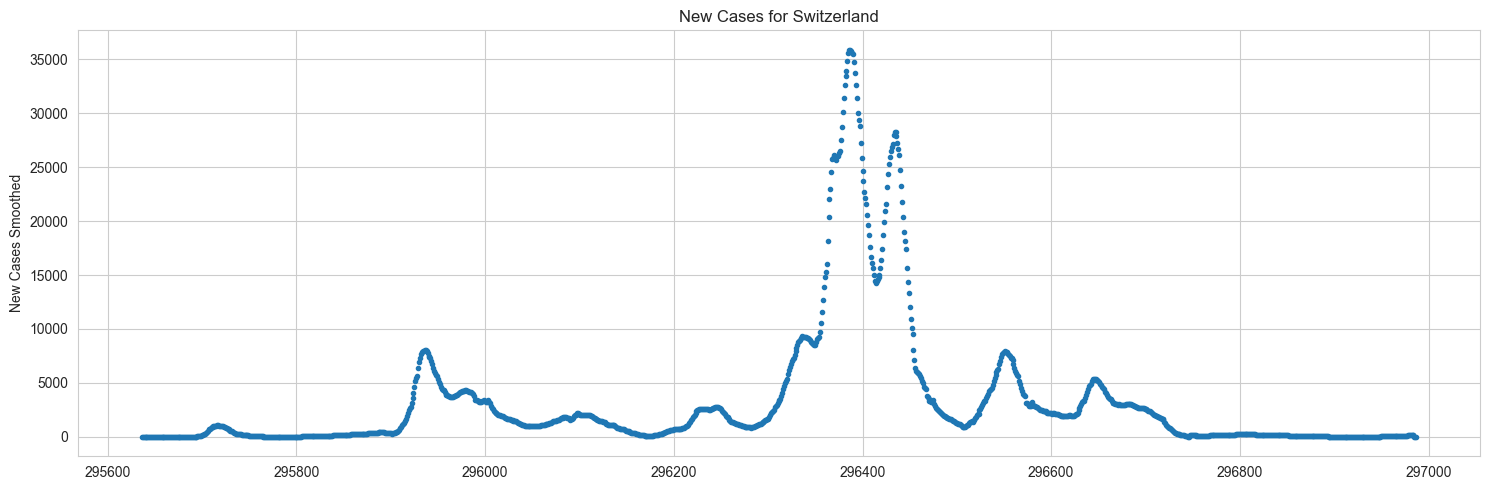

In [195]:
## Plotting Switzerland

plt.figure(figsize=(15, 5))
swiss_data['new_cases_smoothed'].plot(style='.', title=f'New Cases for Switzerland')
plt.ylabel('New Cases Smoothed')

plt.tight_layout()
plt.show()

## Data Cleaning

In [22]:
#data missingness
missing_data = swiss_data.isnull().sum()
threshold = 0.4 * len(swiss_data)
missing_data = missing_data[missing_data < threshold]
missing_data

iso_code                                        0
continent                                       0
location                                        0
date                                            0
total_cases                                    53
new_cases                                       0
new_cases_smoothed                              5
total_deaths                                   63
new_deaths                                      0
new_deaths_smoothed                             5
total_cases_per_million                        53
new_cases_per_million                           0
new_cases_smoothed_per_million                  5
total_deaths_per_million                       63
new_deaths_per_million                          0
new_deaths_smoothed_per_million                 5
reproduction_rate                             324
icu_patients                                  229
icu_patients_per_million                      229
hosp_patients                                 229


In [196]:
# drop features with >40% missingness
threshold = 0.6 * len(swiss_data)

data_clean = swiss_data.dropna(thresh=threshold, axis=1)
data_clean.columns

# Convert the 'date' column to a datetime object
data_clean['date'] = pd.to_datetime(data_clean['date'])

# Set the 'date' column as the index
data_clean.set_index('date', inplace=True)

/var/folders/rt/z4vyc0q16r1f4wgfk65s0psm0000gn/T/ipykernel_1320/7996537.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['date'] = pd.to_datetime(data_clean['date'])


In [197]:
#impute using time fill

# Find the first day where 'new_cases_smoothed' is not null
first_valid_date = data_clean[data_clean['new_cases_smoothed'].notna()].index[0]

# fill everything before that day with 0
data_clean.loc[data_clean.index < first_valid_date, ['new_cases_smoothed']] = 0

# forward fill
data_clean['new_cases_smoothed'].ffill()

# check missingness
missing_values_count = data_clean['new_cases_smoothed'].isnull().sum()
print(missing_values_count)

0


In [198]:
data_clean.head()

,iso_code,continent,location,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,...,aged_70_older,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,human_development_index,population
date,,,,,,,,,,,,,,,,,,,,,
2020-01-03,CHE,Europe,Switzerland,NaN,0.0,0.0,NaN,0.0,NaN,NaN,...,12.644,57410.166,99.739,5.59,22.6,28.9,4.53,83.78,0.955,8740471
2020-01-04,CHE,Europe,Switzerland,NaN,0.0,0.0,NaN,0.0,NaN,NaN,...,12.644,57410.166,99.739,5.59,22.6,28.9,4.53,83.78,0.955,8740471
2020-01-05,CHE,Europe,Switzerland,NaN,0.0,0.0,NaN,0.0,NaN,NaN,...,12.644,57410.166,99.739,5.59,22.6,28.9,4.53,83.78,0.955,8740471
2020-01-06,CHE,Europe,Switzerland,NaN,0.0,0.0,NaN,0.0,NaN,NaN,...,12.644,57410.166,99.739,5.59,22.6,28.9,4.53,83.78,0.955,8740471
2020-01-07,CHE,Europe,Switzerland,NaN,0.0,0.0,NaN,0.0,NaN,NaN,...,12.644,57410.166,99.739,5.59,22.6,28.9,4.53,83.78,0.955,8740471


## Time Series Decomposition

<Figure size 1000x600 with 0 Axes>

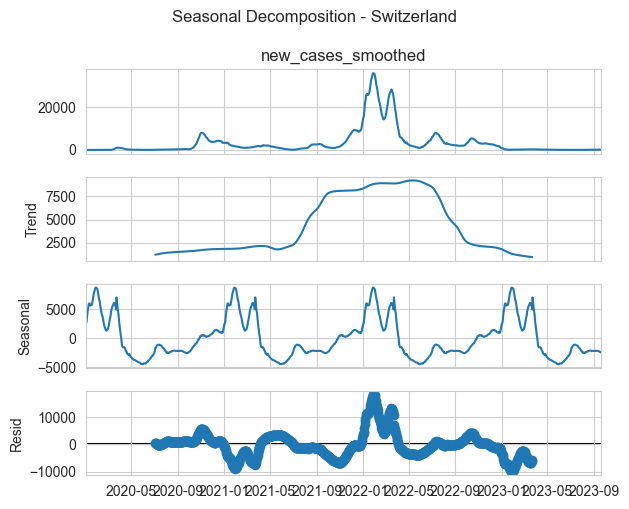

In [171]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose


for country in data_clean['location'].unique():
    country_data = data_clean[data_clean['location'] == country]
    result = seasonal_decompose(country_data['new_cases_smoothed'], period=365)
    
    plt.figure(figsize=(10, 6))
    
    # Create plots
    result.plot()
    
    # Set the title with a higher y value to shift it up
    plt.suptitle(f'Seasonal Decomposition - {country}', y=1.05)
    
    # Save the figure with a lowercase country name
    plt.savefig('acf_plot_' + country.lower() + '.png')
    
    # Display the figure
    plt.show()



## Time Series Data Stationary

In [172]:
from statsmodels.tsa.stattools import adfuller

for country in data_clean['location'].unique():
    country_data = data_clean[data_clean['location'] == country]
    result = adfuller(country_data['new_cases_smoothed'].values)
    
    print(f'Results for {country}:')
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))
    print('---------------------------------------------')


Results for Switzerland:
ADF Statistic: -2.210688
p-value: 0.202389
Critical Values:
	1%: -3.435
	5%: -2.864
	10%: -2.568
---------------------------------------------


## Test Train Split

In [199]:
data_clean_prepped = data_clean.loc[:, ['new_cases_smoothed']]
# test train split
train_size = 0.8  
split_idx = int(len(data_clean_prepped) * train_size)
train = data_clean_prepped.iloc[:split_idx]
test = data_clean_prepped.iloc[split_idx:]


print('Train set shape:', train.shape)
print('Test set shape:', test.shape)


Train set shape: (1085, 1)
Test set shape: (272, 1)


In [200]:
train.head(30)

,new_cases_smoothed
date,
2020-01-03,0.0
2020-01-04,0.0
2020-01-05,0.0
2020-01-06,0.0
2020-01-07,0.0
2020-01-08,0.0
2020-01-09,0.0
2020-01-10,0.0
2020-01-11,0.0


Tuning Parameters and Fitting Model


Auto ARIMA to get optimal params


In [203]:
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error


# Ensure the data is in datetime format and set the index

# Use auto_arima to find the best ARIMA order
model = auto_arima(train, start_p=1, start_d=1, start_q=1, max_p=6, max_d=3, max_q=6, seasonal=False,
                   stepwise=True, trace=True, error_action='ignore', suppress_warnings=True, 
                   scoring='mse')

# Get the best ARIMA order
best_order = model.get_params()['order']

# Train the ARIMA model with the best order
best_model = ARIMA(train, order=best_order)
model_fit = best_model.fit()

# Make predictions on the testing data
predicted_values = model_fit.forecast(steps=len(test))

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(test, predicted_values))

# Print the best order and RMSE
print("Best ARIMA Order:", best_order)
print("Root Mean Squared Error (RMSE):", rmse)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=13853.038, Time=0.10 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=15554.547, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=13858.538, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=14661.405, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=15552.577, Time=0.01 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=13855.801, Time=0.14 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=13834.290, Time=0.07 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=14349.889, Time=0.10 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=13829.309, Time=0.19 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=13826.002, Time=0.15 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=13826.534, Time=0.09 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=13805.765, Time=0.57 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=13796.725, Time=0.46 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=13825.993, Time=0.08 sec
 ARIMA(5,1,1)(0,0,0

/Users/timhong/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/timhong/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/timhong/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Best ARIMA Order: (5, 1, 5)
Root Mean Squared Error (RMSE): 1976.9064574243894


/Users/timhong/Library/Python/3.9/lib/python/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


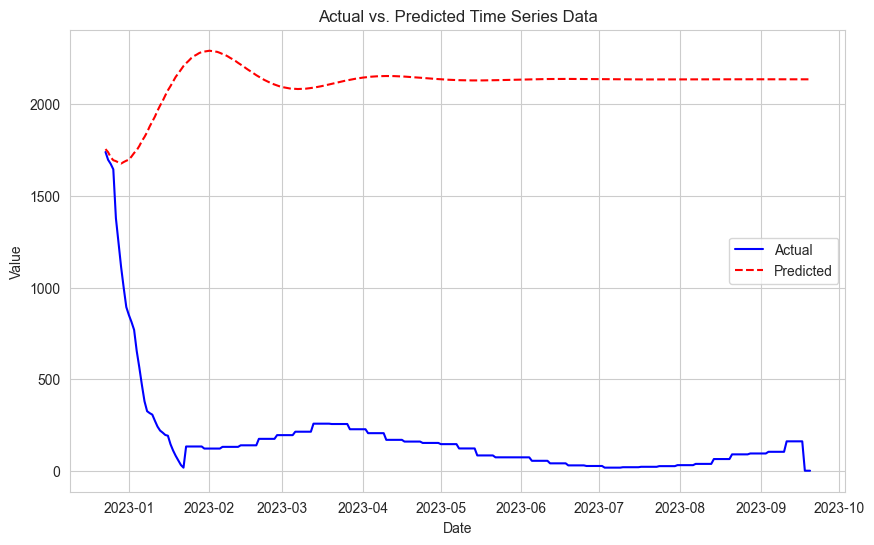

In [204]:
plt.figure(figsize=(10, 6))
plt.plot(test.index, test, label='Actual', color='blue')
plt.plot(test.index, predicted_values, label='Predicted', linestyle='--', color='red')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Actual vs. Predicted Time Series Data')
plt.legend()
plt.show()

Manually Setting p, d, q

/Users/timhong/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/timhong/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/Users/timhong/Library/Python/3.9/lib/python/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Train RMSE: 141.62282537260376
Test RMSE: 1100.3336577352127


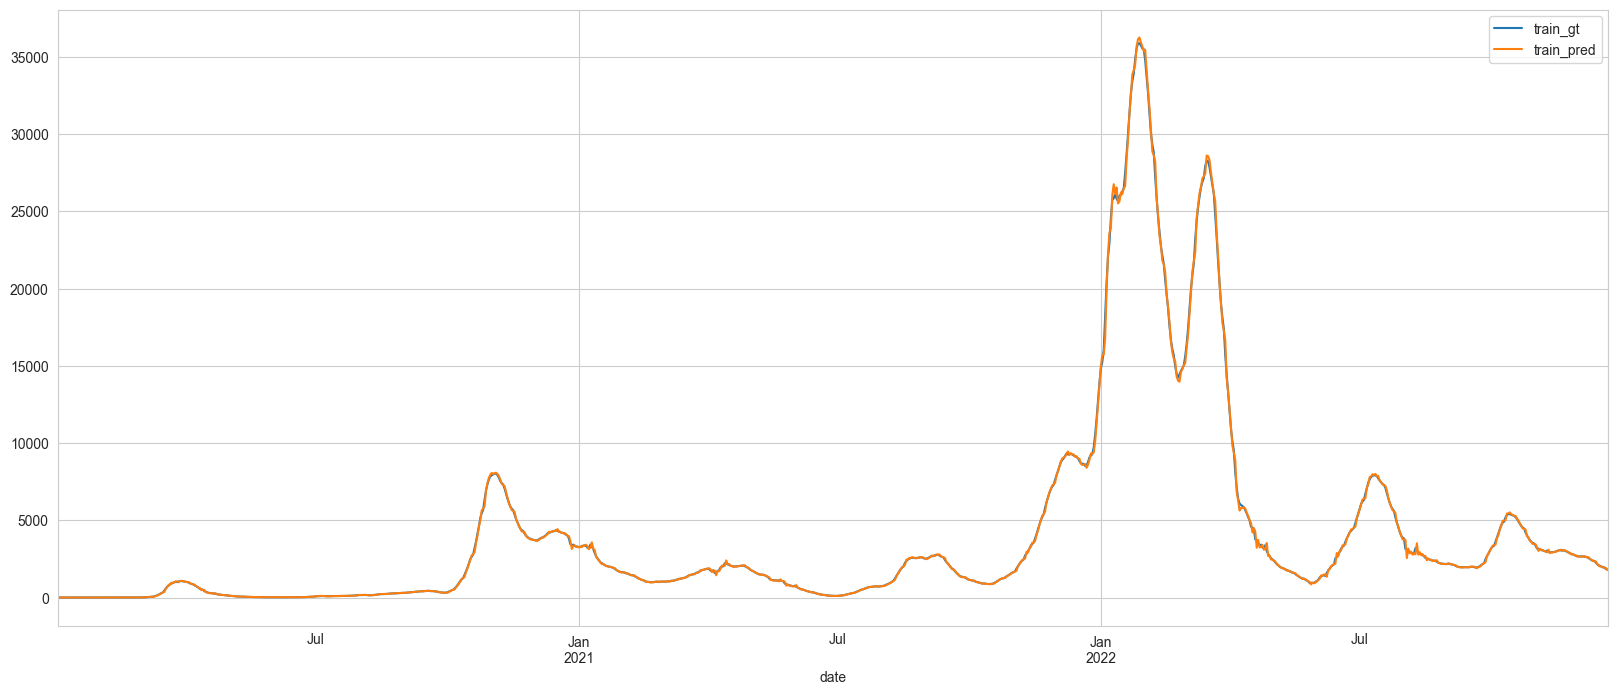

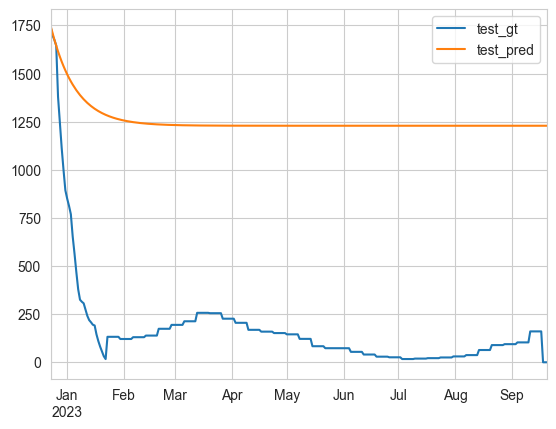

In [205]:
model = ARIMA(train, order=(2, 1, 2))
model=model.fit()
train_pred=model.fittedvalues
pd.concat([train, train_pred], axis=1).plot(figsize=(20, 8))
plt.legend(['train_gt', 'train_pred'])
test_pred=model.predict(start=len(train), end=len(train)+len(test)-1, dynamic=True)
pd.concat([test, test_pred], axis=1).plot()
plt.legend(['test_gt', 'test_pred'])
train_rmse = np.sqrt(mean_squared_error(train, train_pred))
test_rmse = np.sqrt(mean_squared_error(test, test_pred))

print(f'Train RMSE: {train_rmse}')
print(f'Test RMSE: {test_rmse}')